In [17]:
import networkx
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
df = pd.read_csv('sentiment_data.csv', index_col = 0)
df

,sentiment
791538,-1.069520
3991256,0.038659
5176782,-0.724818
6953588,0.701212
9198431,0.743085
...,...
544093157,-0.043530
570880020,-0.148931
584335134,-1.175318
602891468,-0.023073


In [8]:
with open('user_data.json', 'r') as f:
    data = json.load(f)

In [13]:
data = {ix:data[str(ix)] for ix in df.index}

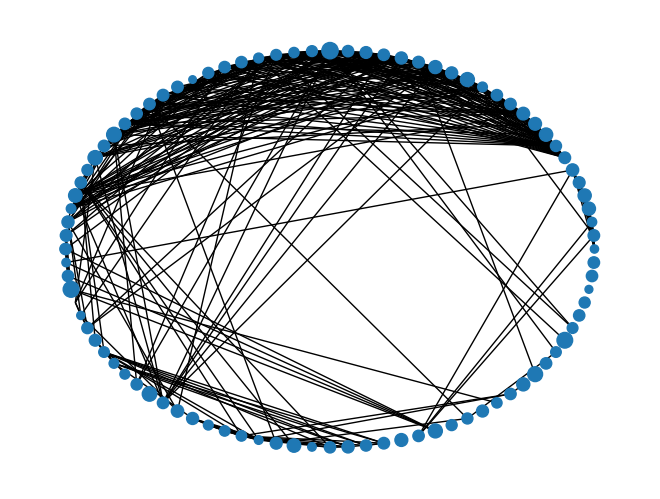

In [162]:
g = networkx.Graph(directed=False)

for i in data:
    g.add_node(i)
    for j in data[i]:
        if i != j and j in data.keys():
            g.add_edge(i, j)

'''            
plt.figure(3,figsize=(16, 9)) 
networkx.draw(g, node_size=30, with_labels=False)
plt.show()'''

pos = networkx.spring_layout(g)
networkx.draw_circular(g, node_size=((df.sentiment * 30) - (df.sentiment * 30).min()).to_list())
#networkx.draw_networkx_edge_labels(g, pos)
plt.show()

In [159]:
(df.sentiment * 10) - (df.sentiment * 50).min()

791538       101.451023
3991256      112.532806
5176782      104.898034
6953588      119.158339
9198431      119.577065
                ...    
544093157    111.710923
570880020    110.656912
584335134    100.393041
602891468    111.915491
661304786    112.328474
Name: sentiment, Length: 92, dtype: float64